In [ ]:
import os
import Augmentor

# Define the base directory where the subfolders are located
base_directory = r"E:\Research\\components"

# Loop through all 15 folders
for i in range(1, 5):
    # Define the path for the current folder using os.path.join
    folder_name = str(i)
    folder_path = os.path.join(base_directory, folder_name)
    
    # Check if the folder exists
    if os.path.exists(folder_path):
        # Create an Augmentor pipeline for image augmentation
        p = Augmentor.Pipeline(folder_path)
        
        # Add augmentation operations as needed
        p.zoom(probability=0.6, min_factor=0.75, max_factor=1)
        p.flip_top_bottom(probability=0.5)
        p.flip_left_right(probability=0.5)
        p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)
        p.rotate_random_90(probability=1)
        p.random_brightness(probability=0.5, min_factor=0.4, max_factor=0.9)
        p.random_distortion(probability=0.5, grid_width=7, grid_height=8, magnitude=9)
        p.random_erasing(probability=0.3, rectangle_area=0.2)
        
        # Sample the augmented images (generate 150 augmented images for each folder)
        p.sample(2000)
    else:
        print(f"Folder {folder_name} does not exist at {folder_path}")

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the root directory containing subfolders for each image class
data_dir = "C:\Users\tanis\OneDrive\Desktop\tries"
batch_size = 32
image_size = (224, 224)  # Adjust the size as needed

# Use the ImageDataGenerator to load and preprocess images
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',  # Specify 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation',  # Specify 'validation' to create the validation dataset
    shuffle=False,  # Do not shuffle the validation data
)

# Optionally, you can create a test dataset in a similar way
# test_data = datagen.flow_from_directory(
#     'test_data_dir',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',  # Use 'categorical' for multi-class classification
#     shuffle=False,  # Do not shuffle the test data
# )

# You can now use train_data and val_data for training and validation in your machine learning model.

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3567605034.py, line 6)

In [27]:
import numpy as np
import cv2 as cv
from glob import glob
from tqdm import tqdm

# Initialize data and label lists
data_list = []
label_list = []

# Define the shape for resizing
image_shape = (32, 32)

# Function to convert an image to an array
def img_to_arr(add, shape):
    image = cv.imread(add)
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, shape)
    image = image.astype("float32") / 255
    return image
path = 'C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\train_ml\\8\41.bmp'
# for i in range(1, 9):
#     print('Extracting patches for Component ' + str(i))

#     type_1 = glob(path + '*.bmp')

#     for image_path in tqdm(type_1):
#         image = img_to_arr(image_path, image_shape)
#         data_list.append(image)
#         label_list.append(i)

# data = np.stack(data_list, axis=0)  # Convert the list of images to a NumPy array
# labels = np.array(label_list)

# # Save the data and labels
# np.save('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\data_32_14.npy', data)
# np.save('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\labels_32_14.npy', labels)


In [6]:
import numpy as np

data_1 = None  # Initialize as None
label1 = []

for i in range(1, 9):
    print('Combining features for ' + str(i))
    
    if i == 14:
        data2 = np.load('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\data_32_' + str(i) + '.npy')
        label2 = np.load('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\labels_32_' + str(i) + '.npy')
        
        if data_1 is None:
            data_1 = data2
        else:
            if data_1.shape[2] == data2.shape[2]:
                data_1 = np.dstack([data_1, data2])
            else:
                print(f"Dimensions don't match for Component {i}. Skipping.")
        
        for j in label2:
            label1.append(j)

# Ensure data_1 has 3 dimensions (height, width, num_samples)
if data_1 is not None and data_1.ndim == 2:
    data_1 = data_1[:, :, np.newaxis]

# Save the combined data and labels
if data_1 is not None:
    np.save('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\fulldata_32.npy', data_1)
if label1:
    np.save('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\fulllabels_32.npy', label1)


Combining features for 1
Combining features for 2
Combining features for 3
Combining features for 4
Combining features for 5
Combining features for 6
Combining features for 7
Combining features for 8


In [8]:
import numpy as np

data_1 = None  # Initialize as None
label1 = []

for i in range(1, 9):
    print('Combining features for ' + str(i))
    
    if i == 14:
        data2 = np.load('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\data_32_' + str(i) + '.npy')
        label2 = np.load('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\labels_32_' + str(i) + '.npy')
        
        if data_1 is None:
            data_1 = data2
        else:
            if data_1.shape[2] == data2.shape[2]:
                data_1 = np.dstack([data_1, data2])
            else:
                print(f"Dimensions don't match for Component {i}. Skipping.")
        
        for j in label2:
            label1.append(j)

# Ensure data_1 has 3 dimensions (height, width, num_samples)
if data_1 is not None and data_1.ndim == 2:
    data_1 = data_1[:, :, np.newaxis]

# Print label1 to check if it's correctly populated
print(label1)

# Save the combined data and labels
if data_1 is not None:
    np.save('E:\\Research\\test\\fulldata_32.npy', data_1)
if label1:
    np.save('E:\\Research\\test\\fulllabels_32.npy', label1)


Combining features for 1
Combining features for 2
Combining features for 3
Combining features for 4
Combining features for 5
Combining features for 6
Combining features for 7
Combining features for 8
[]


In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

# Load data and labels
data_1 = np.load('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\data_32_14.npy')
label = np.load('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\labels_32_14.npy')

# Reshape the data (assuming the shape is (num_samples, height, width))
data_1 = data_1.reshape(data_1.shape[0], 32, 32, 1)

label = label - 1

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data_1, label, test_size=0.4, random_state=10, stratify=label)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10, stratify=y_temp)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# After training, use the model to predict
y_pred = model.predict(X_test)


Epoch 1/10
 940/2365 [==========>...................] - ETA: 22s - loss: 1.4268 - accuracy: 0.4680

Epoch 1/10


c:\Python311\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


296/296 [==============================] - 22s 71ms/step - loss: 1.6197 - accuracy: 0.4049 - val_loss: 1.3531 - val_accuracy: 0.5022
Epoch 2/10
296/296 [==============================] - 18s 62ms/step - loss: 1.1964 - accuracy: 0.5699 - val_loss: 1.1714 - val_accuracy: 0.5667
Epoch 3/10
296/296 [==============================] - 18s 62ms/step - loss: 1.0231 - accuracy: 0.6330 - val_loss: 1.0803 - val_accuracy: 0.6064
Epoch 4/10
296/296 [==============================] - 18s 62ms/step - loss: 0.9221 - accuracy: 0.6696 - val_loss: 1.0522 - val_accuracy: 0.6193
Epoch 5/10
296/296 [==============================] - 18s 62ms/step - loss: 0.8368 - accuracy: 0.7019 - val_loss: 1.0153 - val_accuracy: 0.6356
Epoch 6/10
296/296 [==============================] - 19s 64ms/step - loss: 0.7557 - accuracy: 0.7312 - val_loss: 0.9944 - val_accuracy: 0.6481
Epoch 7/10
296/296 [==============================] - 19s 63ms/step - loss: 0.6798 - accuracy: 0.7610 - val_loss: 0.9983 - val_accuracy: 0.6531
Epo

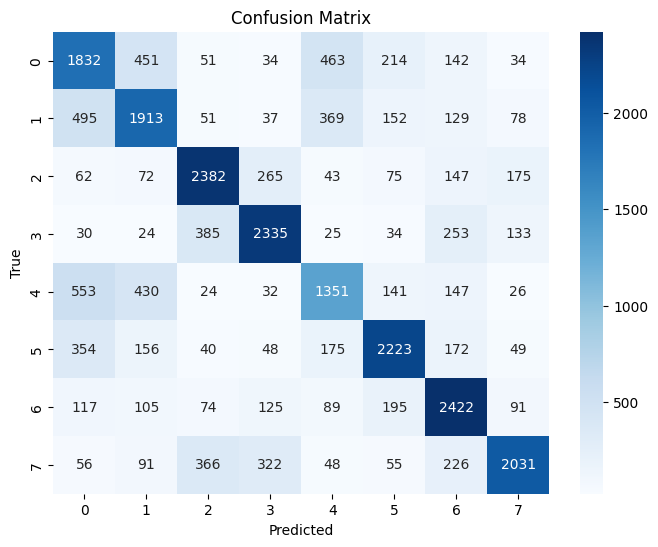

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Clip the labels to the range [0, 9]
y_train_clipped = np.clip(y_train, 0, 9)
y_val_clipped = np.clip(y_val, 0, 9)

from tensorflow.keras.layers import Conv2D, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    # Add more layers as needed
    Flatten(),
    Dense(64, activation='relu'),
    Dense(20, activation='softmax')
])


# Compile the model
model.compile(optimizer='Adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Fit the model with clipped labels
history = model.fit(X_train, y_train_clipped, epochs=10, batch_size=256,
                    validation_data=(X_val, y_val_clipped), callbacks=[early_stop])

# Get predictions on test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import os

# Load data and labels
data_1 = np.load('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\data_32_14.npy')
label = np.load('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\labels_32_14.npy')

# Define your criteria for identifying faulty images
def is_faulty_image(image):
    # Implement your criteria here
    # For example, you can check if the image content is faulty
    # or based on other properties of the image.

    # Here's an example that assumes faulty images have very low mean intensity:
    return np.mean(image) < 0.1  # Adjust the threshold as needed

# Create a folder to store non-faulty images
output_folder = 'C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\non_faulty_images'
os.makedirs(output_folder, exist_ok=True)

# Iterate through the images and labels, and keep non-faulty images
non_faulty_data = []
non_faulty_labels = []

for image, label_value in zip(data_1, label):
    if not is_faulty_image(image):
        non_faulty_data.append(image)
        non_faulty_labels.append(label_value)

# Convert lists to NumPy arrays
non_faulty_data = np.array(non_faulty_data)
non_faulty_labels = np.array(non_faulty_labels)

# Save the non-faulty data and labels
np.save('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\non_faulty_data_32.npy', non_faulty_data)
np.save('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\non_faulty_labels.npy', non_faulty_labels)

# Clean up: Delete the original data and labels files
# os.remove('E:\\Research\\test\\data_32.npy')
# os.remove('E:\\Research\\test\\labels.npy')


In [18]:
# Assuming you have already trained your model and X_test contains test data
# Get predictions from your trained model
y_pred_labels = model.predict(X_test)

# Now you can print the shape and unique values of y_test and y_pred_labels
print(f"y_test shape: {y_test.shape}, unique values: {np.unique(y_test)}")
print(f"y_pred_labels shape: {y_pred_labels.shape}, unique values: {np.unique(y_pred_labels)}")

# Convert one-hot encoded predictions to class labels
y_pred_class_labels = np.argmax(y_pred_labels, axis=1)

# Now, y_pred_class_labels should contain the predicted class labels
print(f"y_pred_class_labels shape: {y_pred_class_labels.shape}, unique values: {np.unique(y_pred_class_labels)}")


789/789 [==============================] - 15s 19ms/step
y_test shape: (25219,), unique values: [0 1 2 3 4 5 6 7]
y_pred_labels shape: (25219, 15), unique values: [0.0000000e+00 2.3686947e-38 2.3693452e-38 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]
y_pred_class_labels shape: (25219,), unique values: [0 1 2 3 4 5 6 7]


In [ ]:
data_1 = np.load('C:\\Users\\tanis\\OneDrive\\Desktop\\tries\\test_ml\\data_32_14.npy')
print(data_1.shape)

In [21]:
# Create CNN model
import tensorflow as tf
import keras
from keras import datasets, layers, models
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(Dropout(0.50))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#model.add(Dropout(0.50))
model.add(layers.Flatten())
model.add(layers.Dense(1024,  activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(15, activation='softmax'))
# Compile model
opt = keras.optimizers.Adam(learning_rate=0.01)

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [17]:
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
#model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
#history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=.2)
history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_val,y_val))

Epoch 1/20
296/296 [==============================] - 115s 372ms/step - loss: 1.4619 - accuracy: 0.4370 - val_loss: 0.8358 - val_accuracy: 0.6894
Epoch 2/20
296/296 [==============================] - 108s 364ms/step - loss: 0.7468 - accuracy: 0.7183 - val_loss: 0.4917 - val_accuracy: 0.8259
Epoch 3/20
296/296 [==============================] - 108s 366ms/step - loss: 0.5370 - accuracy: 0.8004 - val_loss: 0.3898 - val_accuracy: 0.8638
Epoch 4/20
296/296 [==============================] - 108s 364ms/step - loss: 0.4323 - accuracy: 0.8408 - val_loss: 0.3049 - val_accuracy: 0.8956
Epoch 5/20
296/296 [==============================] - 115s 387ms/step - loss: 0.3606 - accuracy: 0.8703 - val_loss: 0.2668 - val_accuracy: 0.9085
Epoch 6/20
296/296 [==============================] - 119s 401ms/step - loss: 0.3086 - accuracy: 0.8882 - val_loss: 0.2311 - val_accuracy: 0.9187
Epoch 7/20
296/296 [==============================] - 114s 385ms/step - loss: 0.2735 - accuracy: 0.9010 - val_loss: 0.2159 -

789/789 - 8s - loss: 0.1178 - accuracy: 0.9600 - 8s/epoch - 10ms/step


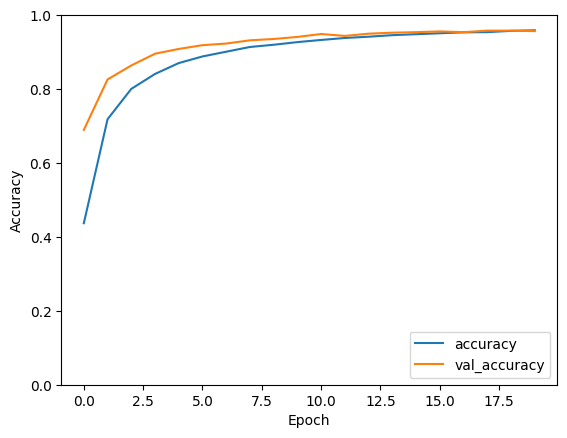

In [19]:
import matplotlib.pyplot as pl
pl.plot(history.history['accuracy'], label='accuracy')
pl.plot(history.history['val_accuracy'], label = 'val_accuracy')
pl.xlabel('Epoch')
pl.ylabel('Accuracy')
pl.ylim([0, 1])
pl.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2) 